In [1]:
import numpy as np     #只需要下载numpy库即可
import GridWorld_v1

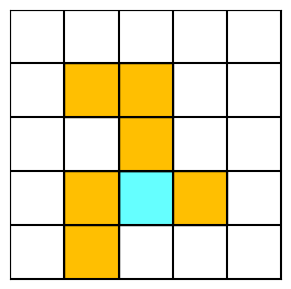

In [2]:
gamma = 0.9   #折扣因子，越接近0越近视
rows = 5      #记得行数和列数这里要同步改
columns = 5
# gridworld = GridWorld_v1.GridWorld_v1(rows=rows, columns=columns, forbiddenAreaNums=4, targetNums=2, seed = random.randint(1,1000))
# gridworld = GridWorld_v1.GridWorld_v1(desc = [".#",".T"])             #赵老师4-1的例子
# gridworld = GridWorld_v1.GridWorld_v1(desc = ["##.T","...#","...."])  #随便弄的例子
desc = [".....",".##..","..#..",".#T#.",".#..."]
gridworld = GridWorld_v1.GridWorld_v1(forbidden_area_score=-10, score=1,desc=desc) 
gridworld.show()

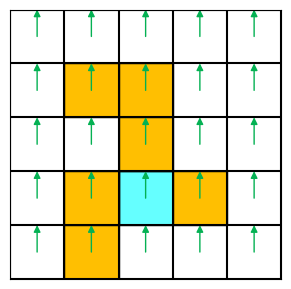

In [3]:
value = np.zeros(rows*columns).reshape(rows,columns)       #初始化可以任意，也可以全0
qtable = np.zeros((rows*columns,5)).reshape(rows,columns,5)  #初始化，这里主要是初始化维数，里面的内容会被覆盖所以无所谓
policy = np.argmax(qtable,axis=1).reshape(rows,columns)     #初始策略
gridworld.show_policy(policy)

In [4]:
policy = np.random.randint(0,5,size=(rows*columns)).reshape(rows,columns) 
#随机[0,5)的整数，代表策略
#这里其实不严谨，因为策略是可以不百分百选一个方向的，可以0.5向上，0.5向右，诸如此类。
#但先不考虑那种情况，因为画图不好画，代码实现逻辑是没差多少的

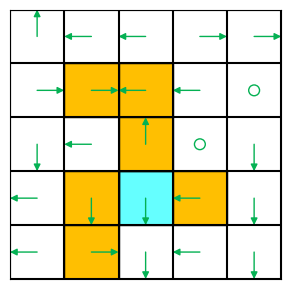

In [5]:
gridworld.show_policy(policy)

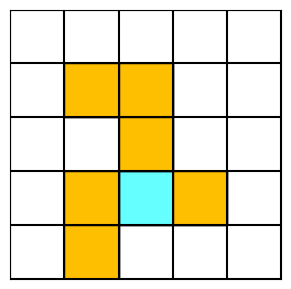

In [6]:
gridworld.show()                     #打印gridworld

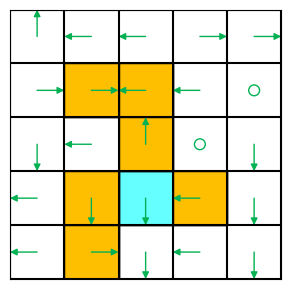

random policy


In [7]:
gridworld.show_policy(policy)         #打印策略
print("random policy")

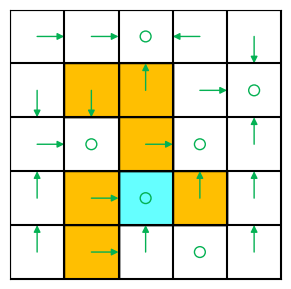

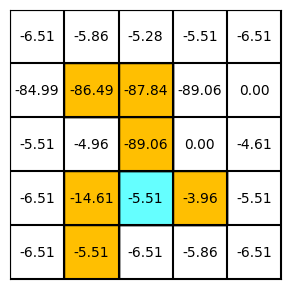

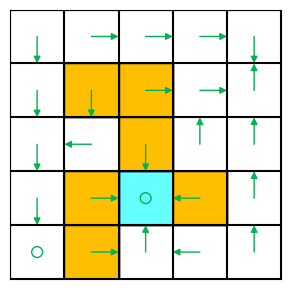

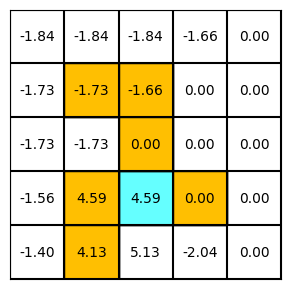

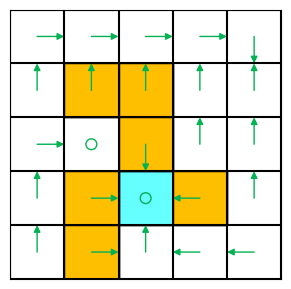

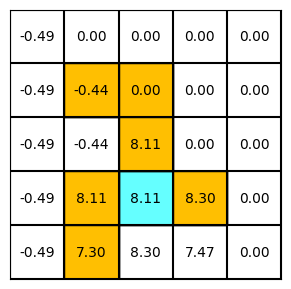

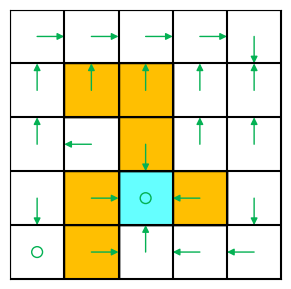

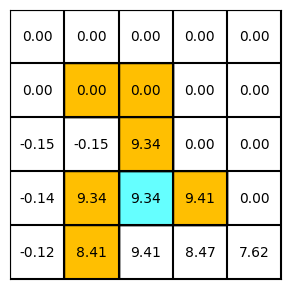

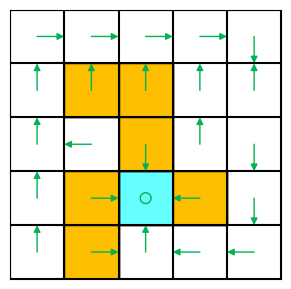

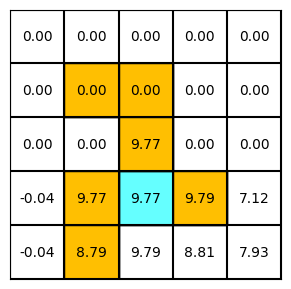

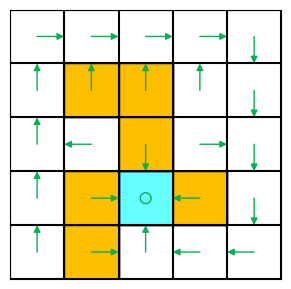

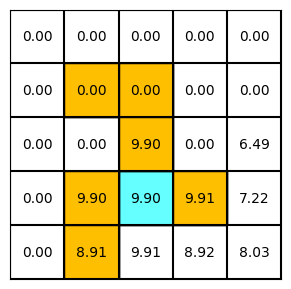

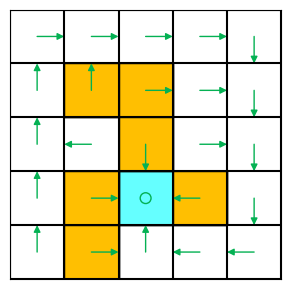

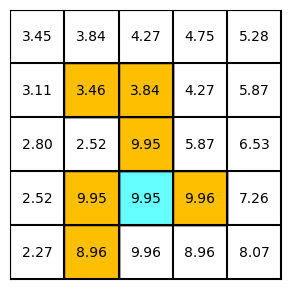

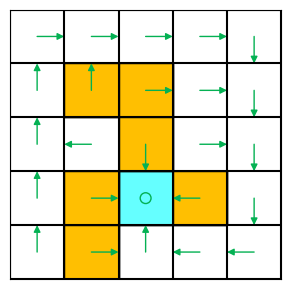

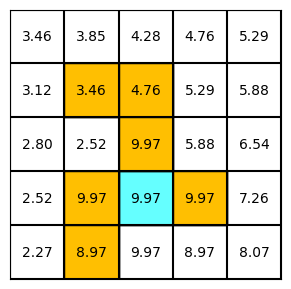

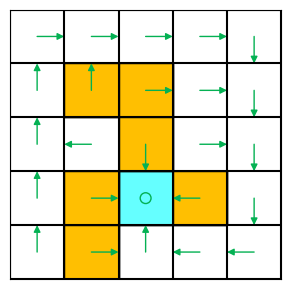

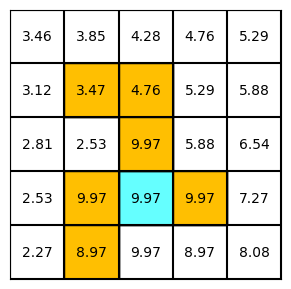

In [8]:
#求解贝尔曼方程
#policy evaluation
# value = np.zeros(rows*columns)
value_pre = value.copy()+1

cnt = 0
while(np.sum((value_pre-value)**2)>0.001):

    value_pre = value.copy() #用来验证整个迭代是否收敛的
    #policy evaluation
                             #这里写了固定，也可以随机，最终都会收敛到同一个结果
    truncatedCnt = 10       # 1:迭代50次  2：迭代26次 3：迭代18次 4：迭代14次  10：迭代6次 100：迭代2次
    
    for _ in range(truncatedCnt):
        value_temp = value.copy() #用来验证整个迭代是否收敛的

        for x in range(rows):
            for y in range(columns):
                j = policy[x][y]
                score, nextState = gridworld.get_score((x,y),j)
                value[x][y] = score + value[nextState] * gamma

        if np.sum((value_temp-value)**2)<0.001:
            break 
    
                
    for x in range(rows):
        for y in range(columns):
            j = policy[x][y]
            score, nextState = gridworld.get_score((x,y),j)   #返回得分以及下一步的state id
            qtable[x][y][j] = score + value[nextState] * gamma #贝尔曼迭代
    
    for now_x in range(rows):      #这里是为了找到当前状态Si的坐标
        for now_y in range(columns):
            for j in range(5): # 5个action
                score,nextState = gridworld.get_score((now_x,now_y),j)        #获取Si状态中，执行动作j后的（得分，下一个状态）
                qtable[now_x][now_y][j] = score + gamma * value[*nextState]  #开始迭代

    #policy improvement
    policy = np.argmax(qtable,axis=2)  #更新策略，非常无敌
    gridworld.show_policy(policy)      #各种打印信息
    gridworld.show_value(value)        #各种打印信息
